In [1]:
import numpy as np
import statsrat as sr
from statsrat import rw
from statsrat.expr.predef.pvl_iti import spont_rec

In [2]:
basic = rw.model(name = 'basic',
                 fbase = rw.fbase.cfg2_intercept,
                 fweight = rw.fweight.none,
                 lrate = rw.lrate.cnst,
                 drate = rw.drate.zero,
                 aux = rw.aux.basic)

decay = rw.model(name = 'decay',
                 fbase = rw.fbase.cfg2_intercept,
                 fweight = rw.fweight.none,
                 lrate = rw.lrate.cnst,
                 drate = rw.drate.hrmn,
                 aux = rw.aux.basic)

Kalman = rw.model(name = 'Kalman',
                  fbase = rw.fbase.cfg2_intercept,
                  fweight = rw.fweight.none,
                  lrate = rw.lrate.from_aux_direct,
                  drate = rw.drate.zero,
                  aux = rw.aux.Kalman)

              min   max  default
extra_counts  1.0  10.0      5.0
lrate         0.0   1.0      0.2
resp_scale    0.0  10.0      1.0


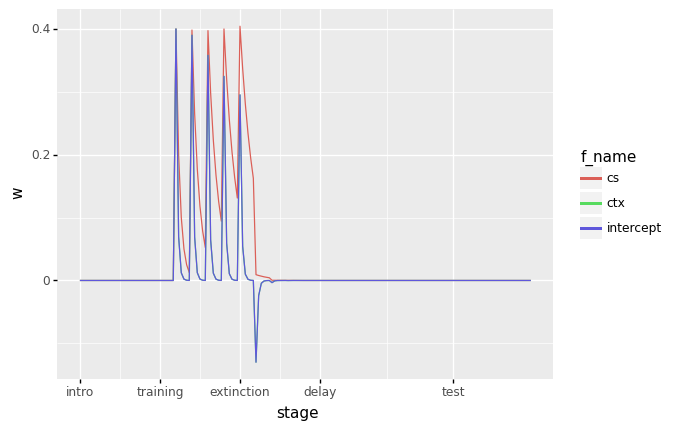

<ggplot: (310587076)>

In [5]:
model = decay
par_val = [1, 0.4, 1]
print(model.pars)

trials = spont_rec.make_trials(schedule = 'experimental')
ds = model.simulate(trials, par_val = par_val)
#sr.learn_plot(ds, var = 'u_hat')
sr.learn_plot(ds, var = 'w', sel = {'f_name': ['ctx', 'cs', 'intercept']})